In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from scipy.stats import norm

np.random.seed(713)

In [2]:
def plt_heat_map(title,data):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(data, origin='lower', cmap='rainbow', aspect='auto')
    fig.colorbar(cax)
    ax.xaxis.set_ticks_position('bottom')
    plt.title(title)
    plt.show()
    
def append_1_col(A):
    B = np.ones((A.shape[0],A.shape[1]+1))
    B[:,:-1]=A
    return B

def q_func(x):
    return 1-norm.cdf(x)

In [3]:
N_data = 200
SNR_dB = 2.0
AFFINE = True

sig_0=np.ones(2*N_data)
# print(sig_0)
sig_0=np.reshape(sig_0,(N_data,2))
# print(sig_0)
sig_1=-1*np.copy(sig_0)
# print(sig_1)
snr = 10**(SNR_dB/10.0)

sigma_w = np.sqrt(2.0/snr)
x_0 = sig_0 + np.random.normal(0,sigma_w,np.shape(sig_0))
# print(x_0)
x_1 = sig_1 + np.random.normal(0,sigma_w,np.shape(sig_1))
# print(x_1)

In [4]:
np.shape(x_0)

(200, 2)

In [5]:
X=np.vstack((x_0,x_1))
print(X)
y=np.append(np.ones(N_data),-1*np.ones(N_data))
print(y)
print(np.shape(y))

[[ 2.96012335e+00  2.68702129e+00]
 [ 6.00597658e-01  2.76877418e+00]
 [ 2.02044794e+00 -1.04178176e+00]
 [ 1.73133713e+00  2.14403417e+00]
 [ 1.71887880e+00  3.21398968e-01]
 [ 5.18508788e-01  1.60948303e+00]
 [ 7.12093631e-01  3.69714097e-01]
 [ 3.55638199e-01  1.63320295e+00]
 [ 2.84440362e+00  1.64649623e+00]
 [ 1.74947385e+00 -1.27936546e+00]
 [ 1.56201588e-01 -2.26199216e-01]
 [-4.65548403e-01  1.48242282e+00]
 [-2.53918836e-01  2.18813023e+00]
 [ 2.15455844e+00  1.38929132e+00]
 [ 1.38381586e+00  8.69940972e-01]
 [-1.05107965e+00  1.45507897e+00]
 [-4.51074875e-01 -4.55870179e-01]
 [ 2.24050751e+00  2.10176824e+00]
 [ 2.97137960e+00  2.19461822e+00]
 [ 1.16229842e+00  2.99405905e-01]
 [ 1.12548929e+00  3.84718606e-01]
 [-5.73487108e-01  4.30552047e-01]
 [ 2.87363492e+00  6.18167171e-01]
 [ 7.95105434e-01  1.69680164e+00]
 [-3.45632952e-01  1.00684783e+00]
 [ 7.45943621e-01  3.60964733e-01]
 [ 2.04095300e+00  4.60583066e-02]
 [-6.78839223e-01  1.40213558e+00]
 [ 1.71288285e-01  1

In [6]:
np.shape(X)

(400, 2)

In [7]:
if AFFINE:
    X=append_1_col(X)
print(X)
w,Re,rank,singular_vals = np.linalg.lstsq(X,y,rcond=None)
print(w)
print(Re)
print(rank)
print(singular_vals)

[[ 2.96012335  2.68702129  1.        ]
 [ 0.60059766  2.76877418  1.        ]
 [ 2.02044794 -1.04178176  1.        ]
 ...
 [-0.49332856  0.10454741  1.        ]
 [-2.56279579 -1.51003467  1.        ]
 [-0.55924202 -3.10159986  1.        ]]
[0.34167998 0.24723987 0.00688811]
[162.11520642]
3
[36.76005397 22.92264654 19.98177773]


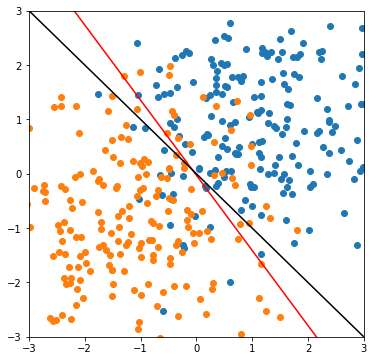

In [17]:
LIMIT = 3
x_plot = np.arange(-1*LIMIT,LIMIT,0.01)
fig = plt.figure(figsize=(6,6))
plt.scatter(x_0.T[0],x_0.T[1])
plt.scatter(x_1.T[0],x_1.T[1])
if AFFINE:
    plt.plot(x_plot,-1*(w[0]*x_plot+w[2]) / w[1],c='r')
else:
    plt.plot(x_plot,-1*w[0]*x_plot / w[1],c='r')
plt.plot(x_plot,-1*x_plot,c='k')
axes=plt.gca()
axes.set_ylim([-1*LIMIT,LIMIT])
axes.set_xlim([-1*LIMIT,LIMIT])
plt.show()

In [8]:
y_hat_soft=w@X.T
y_hat_hard=np.sign(y_hat_soft)
prob_mc=np.mean(y!=y_hat_hard)
print('mis classification rate: ',prob_mc)

mis classification rate:  0.1125
